# OBESITY PREDICTION USING CLASSIFIER MODELS

## TOOLS AND THE DATA SET

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline
from scipy.stats import shapiro
from xgboost import XGBClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

#The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC),
# Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), 
# Consumption of water daily (CH20), and Consumption of alcohol (CALC). 
# The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), 
# Time using technology devices (TUE), Transportation used (MTRANS)
df = pd.read_csv('ObesityDataSet.csv')
df.head(10)

C:\Users\john.g\AppData\Local\Temp\ipykernel_10428\2671058301.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


## 1. DATA PROCESSING

In [2]:
# Recognize categorica columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# LabelEncoder object
label_encoder = LabelEncoder()

# label encode to each categorical column in the set
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,1


## 2. FEATURE SELECTION

#### Correlation method

In [3]:
# Variable correlation with output 'NObeyesdad'
cor = df.corr()
target = (cor["NObeyesdad"])
target

Gender                            0.024908
Age                               0.236170
Height                            0.038986
Weight                            0.387643
family_history_with_overweight    0.313667
FAVC                              0.044582
FCVC                              0.018522
NCP                              -0.092616
CAEC                              0.327295
SMOKE                            -0.023256
CH2O                              0.108868
SCC                              -0.050679
FAF                              -0.129564
TUE                              -0.069448
CALC                             -0.134632
MTRANS                           -0.046202
NObeyesdad                        1.000000
Name: NObeyesdad, dtype: float64

<Axes: >

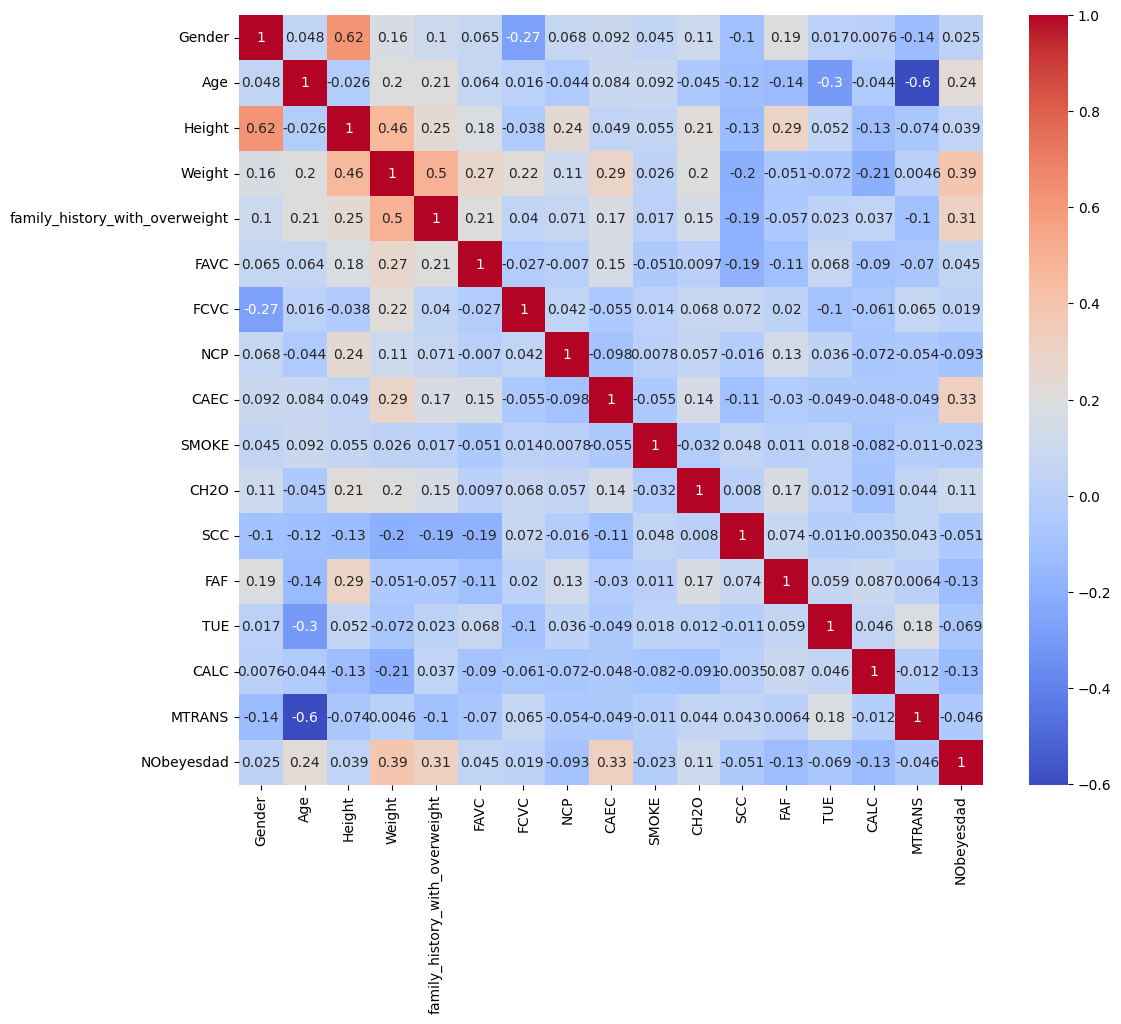

In [4]:
# Plotting corelation
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot = True, cmap=plt.cm.coolwarm)

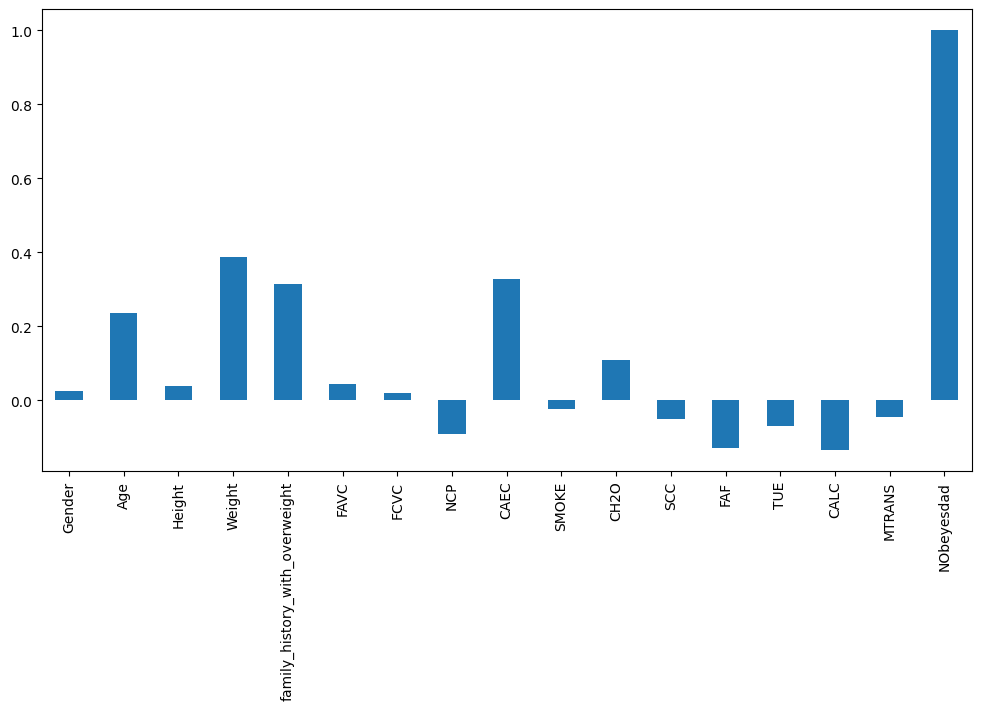

In [5]:
plt.figure(figsize=(12,6))
df.corr()['NObeyesdad'].plot(kind='bar');

In [6]:
#Mutual information (where the larger the value the greater the relationship between the two variables)
X_m = df.drop(["NObeyesdad"], axis=1)
y_m = df["NObeyesdad"]
importance = mutual_info_classif(X_m, y_m, random_state=100)
importance

array([0.19965423, 0.57993842, 0.41990721, 1.24886098, 0.13672418,
       0.0738799 , 0.38601477, 0.23464656, 0.13062053, 0.02835614,
       0.28246905, 0.04971727, 0.28601028, 0.29440216, 0.05701714,
       0.07514342])

##### I placed the feature threshold at 0.01 and since all variabke surpass the treshold, non is going to get dropped

## 3. MODELING

In [7]:
# Processing and spliting the set
X = df.drop('NObeyesdad', axis= 1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

In [8]:
# Scaling the data set ( start with the training set)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# then the same t scaling to the training set
X_test_scaled = scaler.transform(X_test)

### 3.1 KNN K-Nearest Neighbors

In [9]:
# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
predictions_1 = knn.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_1)
print("Accuracy:", accuracy)

Accuracy: 0.789598108747045


### 3.2 SVM Support Vector Machines

In [10]:
# SVM classifier using One vs Rest strategy (for multiclass set)
svm = SVC(kernel='linear', decision_function_shape='ovr')

# Train the SVm model
svm.fit(X_train_scaled, y_train)

# Predict the labels for the test set
predictions_2 = svm.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_2)
print("Accuracy:", accuracy)


Accuracy: 0.9479905437352246


### 3.3 Decision Tree

In [11]:
# Decision tree classifier
dtc = DecisionTreeClassifier(max_depth= 10, random_state= 42)

# Train the model
dtc.fit(X_train_scaled, y_train)

# Predict the labels for the test set
predictions_3 = dtc.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_3)
print("Accuracy:", accuracy)

Accuracy: 0.9101654846335697


### 3.4 Random Forest

In [12]:
# Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rfc.fit(X_train_scaled, y_train)

# Predict the labels for the test set
predictions_4 = rfc.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_4)
print("Accuracy:", accuracy)

Accuracy: 0.8605200945626478


### 3.5 XGBoost

In [22]:
# XGBoost classifier
xg = XGBClassifier()

# Train the model
xg.fit(X_train_scaled, y_train)

# Predict the labels for the test set
predictions_5 = xg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_5)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.9550827423167849


### 3.6 Cros validation of all models(checking performance)

In [14]:
# Performance of all models trained by 5 folds
models = [knn, svm, dtc, rfc, xg]
model_names = ['KNN', 'SVM', 'DTC', 'RFC', 'XGB']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X, y, cv=5)
    print("Row cross validation", name, ":", scores)

Row cross validation KNN : [0.78250591 0.85308057 0.88151659 0.85781991 0.86729858]
Row cross validation SVM : [0.74704492 0.8957346  0.89336493 0.91469194 0.92417062]
Row cross validation DTC : [0.82742317 0.94549763 0.94312796 0.93364929 0.95260664]
Row cross validation RFC : [0.6501182  0.90758294 0.88151659 0.89336493 0.92890995]
Row cross validation XGB : [0.8250591  0.98341232 0.98578199 0.99526066 0.992891  ]


## 4. HYPER PARAMETER TUNNING

### 4.1 Grid Search

In [15]:
# parameter grid for XGB
param_grid = {'learning_rate': [0.1, 0.01, 0.001],'n_estimators': [50, 200, 400],'max_depth': [3, 5, 7]}

# GridSearchCV object for XGBoost
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)

# Fitting the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 200, 400]})

In [16]:
print(grid_search.best_params_)
print(grid_search.cv_results_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
{'mean_fit_time': array([0.1271059 , 0.49661951, 0.94708014, 0.20861926, 0.65342736,
       1.11172438, 0.25578847, 0.73631554, 1.14544935, 0.2357327 ,
       0.78601389, 1.52821584, 0.31712217, 1.05884447, 1.8182776 ,
       0.32817163, 1.31906133, 2.28971424, 0.153578  , 0.58140602,
       1.10268173, 0.21385589, 0.90171218, 1.75574174, 0.28707008,
       1.20263433, 2.62404099]), 'std_fit_time': array([0.01312109, 0.04603644, 0.03323726, 0.02630095, 0.04074823,
       0.01517876, 0.029063  , 0.03366086, 0.03713643, 0.11538692,
       0.16494855, 0.25980639, 0.05552619, 0.09230525, 0.06957682,
       0.02905576, 0.15090649, 0.09902379, 0.01576276, 0.04169385,
       0.03798645, 0.01296547, 0.04692517, 0.03551789, 0.02040771,
       0.06290297, 0.25105803]), 'mean_score_time': array([0.00745387, 0.0057765 , 0.00466337, 0.00483041, 0.00083032,
       0.0078301 , 0.00378146, 0.0042521 , 0.00290794, 0.00300174,
       0.00595274

In [32]:
# Refitting the model with the new best hyperparameters
para = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
xg = XGBClassifier(**para)

# Train the model
model_tune = xg.fit(X_train_scaled, y_train)

# Predict the labels for the test set
predictions_5 = xg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_5)

print("XGBoost Hyperparameter Tune Accuracy:", accuracy)


XGBoost Hyperparameter Tune Accuracy: 0.9598108747044918


## 5. TESTING THE MODEL

In [18]:

# Loading the test data
df_test = pd.read_csv('test.csv')


In [36]:
# Recognize categorica columns
categorical_cols_2 = df_test.select_dtypes(include=['object']).columns.tolist()

# LabelEncoder object
label_encoder = LabelEncoder()

# label encode to each categorical column in the set
for col in categorical_cols_2:
    df_test[col] = label_encoder.fit_transform(df_test[col])

# Make predictions on test data
test_predictions_fin = model_tune.predict(df_test.drop(columns=['id']))

# Create DataFrame with id and predicted NObeyesdad
submission_df = pd.DataFrame({'id': df_test['id'], 'NObeyesdad': test_predictions_fin})
print(submission_df)


          id  NObeyesdad
0      20758           3
1      20759           4
2      20760           4
3      20761           3
4      20762           4
...      ...         ...
13835  34593           3
13836  34594           4
13837  34595           4
13838  34596           3
13839  34597           3

[13840 rows x 2 columns]


In [39]:
# Save the submission file
submission_df.to_csv('submission.csv', index=False)